In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load data
df = pd.read_csv("car_price_prediction_.csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [3]:
# drop data
df = df.dropna(axis=0)
df = df.drop(["Car ID", "Model", "Brand"], axis = "columns")
# df = df.drop("Car ID", axis = "columns")

In [4]:
# feature engeneering
df = pd.get_dummies(df, columns=["Fuel Type", "Transmission", "Condition"], drop_first=True)
# df = pd.get_dummies(df, columns=["Fuel Type", "Transmission", "Condition", "Model", "Brand"], drop_first=True)

In [5]:
# split data
X = df.drop(["Price"], axis = "columns")
y = df["Price"]
X.head()

,Year,Engine Size,Mileage,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Manual,Condition_New,Condition_Used
0,2016,2.3,114832,False,False,True,True,True,False
1,2018,4.4,143190,True,False,False,True,False,True
2,2013,4.5,181601,True,False,False,True,True,False
3,2011,4.1,68682,False,False,False,False,True,False
4,2009,2.6,223009,False,False,False,True,False,False


In [6]:
# split train and test
from sklearn.model_selection import train_test_split

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# define and fit model
model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression

# Calculate Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mae:.2f}")

# Calculate R-squared (how well the model explains variance)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")



Mean Squared Error: 26944.21
R² Score: -0.35


In [9]:
# diffrent model
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,            # Or try 7, 8, 12
    min_samples_leaf=5,      # Prevents tiny splits that overfit
    random_state=1
)
random_forest_model.fit(X_train, y_train)
f_y_test_pred = random_forest_model.predict(X_test)
f_y_train_pred = random_forest_model.predict(X_train)

print("MAE test Score:", mean_absolute_error(y_test, f_y_test_pred))
print("MAE train Score:", mean_absolute_error(y_train, f_y_train_pred))

print("R² test Score:", r2_score(y_test, f_y_test_pred))
print("R² train Score:", r2_score(y_train, f_y_train_pred))


MAE test Score: 23823.046375516755
MAE train Score: 21420.846473015434
R² test Score: -0.009189971109809347
R² train Score: 0.17417653036910385


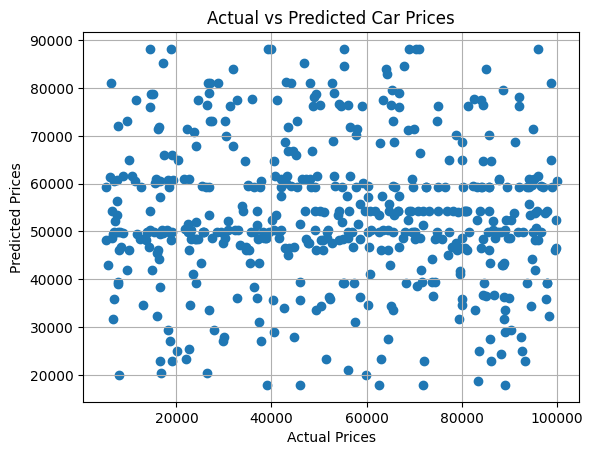

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
